In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

tf.enable_eager_execution()

%matplotlib inline

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Activation Functions

In [14]:
x = np.linspace(-10, 10)

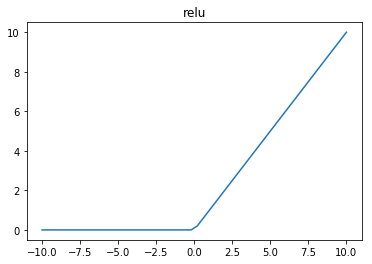

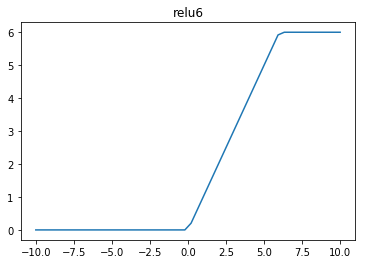

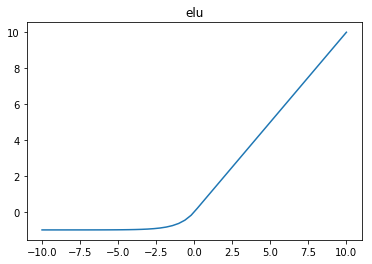

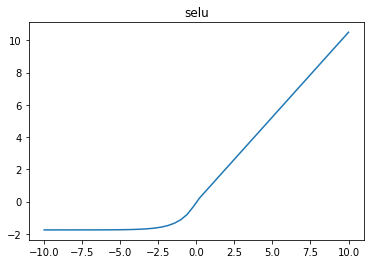

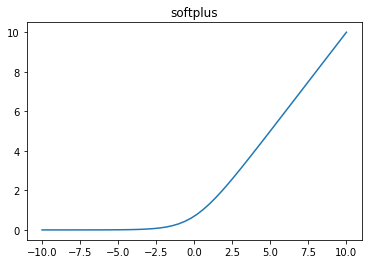

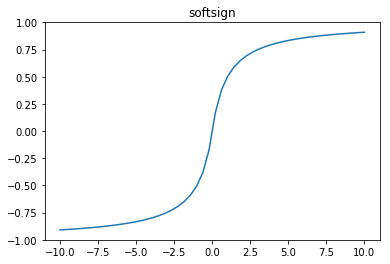

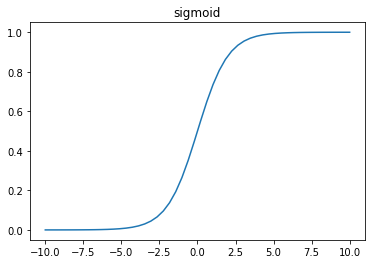

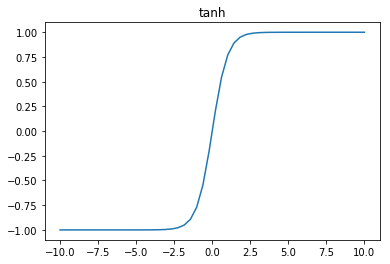

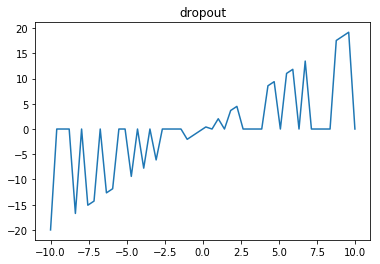

In [36]:
from functools import partial

for f in [
        tf.nn.relu,
        tf.nn.relu6,
        tf.nn.elu,
        tf.nn.selu,
        tf.nn.softplus,
        tf.nn.softsign,
        tf.sigmoid,
        tf.tanh,
        partial(tf.nn.dropout, keep_prob=.5),
        ]:
    y = f(x)
    plt.figure()
    name = f.__name__ if hasattr(f, '__name__') else f.func.__name__
    plt.title(name)
    plt.plot(x, y)

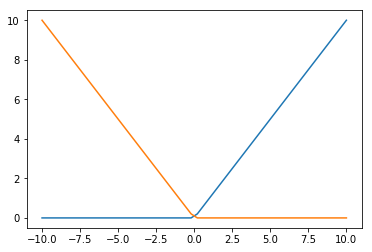

In [18]:
y = tf.nn.crelu(x)
plt.plot(x, y[:len(x)], x, y[len(x):])

(1, 768, 1024, 3)


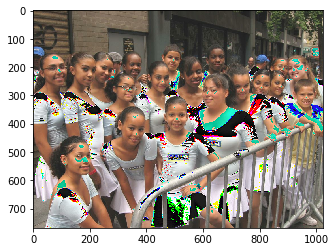

In [48]:
img = tf.image.decode_jpeg(open('test.jpg', 'rb').read())
img = tf.expand_dims(img, 0)
print(img.shape)
y = tf.nn.bias_add(img, [31, 31, 31])
im = tf.squeeze(y, 0)
plt.imshow(im)

# Convolution

名字模式

conv2d: Arbitrary filters that can mix channels together.
所有通道一起计算

depthwise_conv2d: Filters that operate on each channel independently.
每个通道单独计算

separable_conv2d: A depthwise spatial filter followed by a pointwise filter.
通道单独计算后，再每个点单独计算

atrous_conv2d
空洞卷积

{depthwise, separable, atrous}_conv{1, 2, 3}d_transpose

convolution
n维卷积

In [73]:
one = np.ones([9])
blocks = tf.constant([(block * i) for i in range(9)])
big = tf.reshape(blocks, [1, 3, 3, 9])
x = tf.depth_to_space(big, 3)
print(x.shape)
print(tf.squeeze(x))

(1, 9, 9, 1)
tf.Tensor(
[[0. 0. 0. 1. 1. 1. 2. 2. 2.]
 [0. 0. 0. 1. 1. 1. 2. 2. 2.]
 [0. 0. 0. 1. 1. 1. 2. 2. 2.]
 [3. 3. 3. 4. 4. 4. 5. 5. 5.]
 [3. 3. 3. 4. 4. 4. 5. 5. 5.]
 [3. 3. 3. 4. 4. 4. 5. 5. 5.]
 [6. 6. 6. 7. 7. 7. 8. 8. 8.]
 [6. 6. 6. 7. 7. 7. 8. 8. 8.]
 [6. 6. 6. 7. 7. 7. 8. 8. 8.]], shape=(9, 9), dtype=float64)


In [75]:
y = tf.nn.conv2d(
    x,
    filter=np.ones([3, 3, 1, 1]),
    strides=[1, 3, 3, 1],
    padding="VALID")
print(y.shape)
print(tf.squeeze(y))

(1, 3, 3, 1)
tf.Tensor(
[[ 0.  9. 18.]
 [27. 36. 45.]
 [54. 63. 72.]], shape=(3, 3), dtype=float64)


tf.Tensor(
[[0. 0. 0. 1. 1. 1. 2. 2. 2.]
 [0. 0. 0. 1. 1. 1. 2. 2. 2.]
 [0. 0. 0. 1. 1. 1. 2. 2. 2.]
 [3. 3. 3. 4. 4. 4. 5. 5. 5.]
 [3. 3. 3. 4. 4. 4. 5. 5. 5.]
 [3. 3. 3. 4. 4. 4. 5. 5. 5.]
 [6. 6. 6. 7. 7. 7. 8. 8. 8.]
 [6. 6. 6. 7. 7. 7. 8. 8. 8.]
 [6. 6. 6. 7. 7. 7. 8. 8. 8.]], shape=(9, 9), dtype=float64)
